# 120 years of Olympic history: athletes and results

https://www.kaggle.com/datasets/heesoo37/120-years-of-olympic-history-athletes-and-results?select=athlete_events.csv

In [ ]:
Užduotys:
Kaip keitėsi olimpinių žaidynių valstybių, sportininkų, medalių skaičius bendrai ir per laiką.
Olimpinėse žaidinėse dalyvavusių valstybių analizė pagal kelis kriterijus:
1. Kokios šalys laimėjo daugiausia medalių bendrai ir Aukso, Sidabro, Bronzos medalius atskirai.
2. Kokios sporto šakos laimėjo daugiausia medalių
3. Kurių šalių sportininkai, gavo daugiausia apdovanojimų.
4. Kaip keitės dalyvavusių šalių skaičius, sportininkų skaičius, sporto šalių skaičius.
5. Sportininkai, laimėję daugiausia medalių.
6. Mini Lietuvos ir Latvijos analizė

In [ ]:
Basic bio data on athletes and medal results from Athens 1896 to Rio 2016
The file athlete_events.csv contains 271116 rows and 15 columns. 
The columns are:

- ID - Unique number for each athlete
- Name - Athlete's name
- Sex - M or F
- Age - Integer
- Height - In centimeters
- Weight - In kilograms
- Team - Team name
- NOC - National Olympic Committee 3-letter code
- Games - Year and season
- Year - Integer
- Season - Summer or Winter
- City - Host city
- Sport - Sport
- Event - Event
- Medal - Gold, Silver, Bronze, or NA

In [278]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import statsmodels.formula.api as smf

In [279]:
df_olimpic = pd.read_csv('athlete_events.csv')
rg = pd.read_csv('noc_regions.csv')

In [280]:
df_olimpic.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [281]:
df_olimpic = df_olimpic[~df_olimpic['Age'].isnull()]

In [282]:
rg.head()

,NOC,region,notes
0,AFG,Afghanistan,NaN
1,AHO,Curacao,Netherlands Antilles
2,ALB,Albania,NaN
3,ALG,Algeria,NaN
4,AND,Andorra,NaN


In [283]:
df_olimpic.columns

Index(['ID', 'Name', 'Sex', 'Age', 'Height', 'Weight', 'Team', 'NOC', 'Games',
       'Year', 'Season', 'City', 'Sport', 'Event', 'Medal'],
      dtype='object')

In [284]:
df_olimpic.describe()

,ID,Age,Height,Weight,Year
count,261642.000000,261642.000000,210068.000000,207379.000000,261642.000000
mean,68291.263960,25.556898,175.351367,70.712603,1980.100221
std,38997.527135,6.393561,10.524847,14.358602,28.629035
min,1.000000,10.000000,127.000000,25.000000,1896.000000
25%,34755.250000,21.000000,168.000000,60.000000,1964.000000
50%,68198.000000,24.000000,175.000000,70.000000,1988.000000
75%,102108.750000,28.000000,183.000000,79.000000,2004.000000
max,135571.000000,97.000000,226.000000,214.000000,2016.000000


In [285]:
#informacija apie kiekvieną stulpelį
df_olimpic.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 261642 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      261642 non-null  int64  
 1   Name    261642 non-null  object 
 2   Sex     261642 non-null  object 
 3   Age     261642 non-null  float64
 4   Height  210068 non-null  float64
 5   Weight  207379 non-null  float64
 6   Team    261642 non-null  object 
 7   NOC     261642 non-null  object 
 8   Games   261642 non-null  object 
 9   Year    261642 non-null  int64  
 10  Season  261642 non-null  object 
 11  City    261642 non-null  object 
 12  Sport   261642 non-null  object 
 13  Event   261642 non-null  object 
 14  Medal   39051 non-null   object 
dtypes: float64(3), int64(2), object(10)
memory usage: 31.9+ MB


In [286]:
len(df_olimpic)

261642

In [287]:
df = pd.merge(df_olimpic, rg, on='NOC', how='left')

In [288]:
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN,China,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN,China,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN,Denmark,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN,Netherlands,NaN


In [289]:
columns = ['Sex', 'Age', 'Height', 'Weight', 'Year']
df_subset = df[columns]

In [290]:
df_subset

,Sex,Age,Height,Weight,Year
0,M,24.0,180.0,80.0,1992
1,M,23.0,170.0,60.0,2012
2,M,24.0,NaN,NaN,1920
3,M,34.0,NaN,NaN,1900
4,F,21.0,185.0,82.0,1988
...,...,...,...,...,...
261637,M,29.0,179.0,89.0,1976
261638,M,27.0,176.0,59.0,2014
261639,M,27.0,176.0,59.0,2014
261640,M,30.0,185.0,96.0,1998


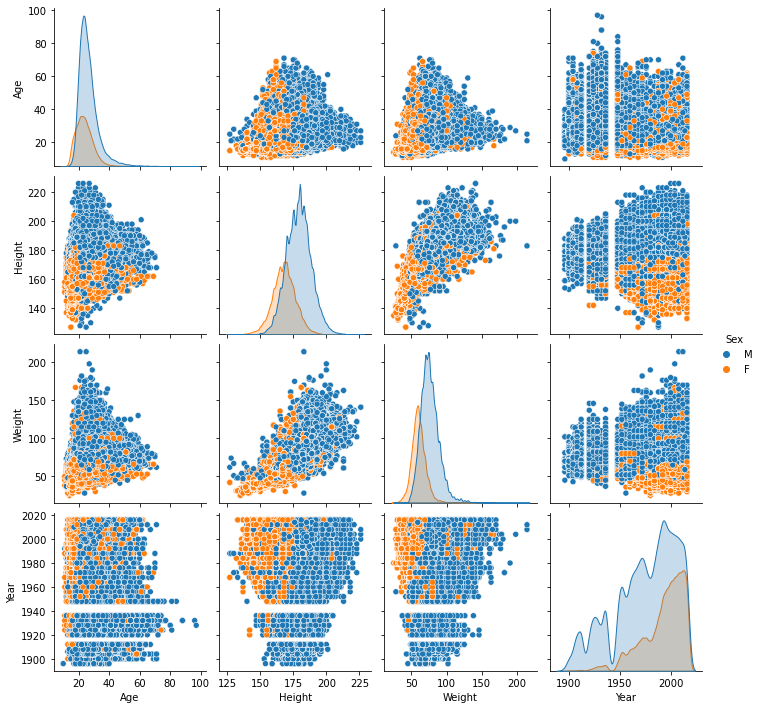

In [291]:
#Visų kintamųjų išsidėstymas su visais kintamaisiais
sns.pairplot(df_subset, hue = 'Sex')

<AxesSubplot:xlabel='Age', ylabel='Count'>

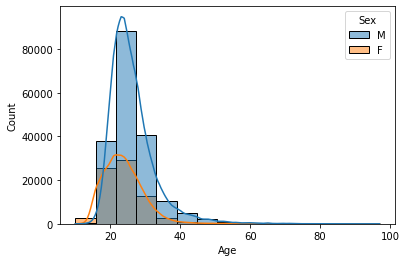

In [292]:
# Moterų ir vyrų pasiskirstymas pagal amžių
sns.histplot(data= df, x='Age', bins=15, hue='Sex', kde=True)

<AxesSubplot:xlabel='Age', ylabel='Sex'>

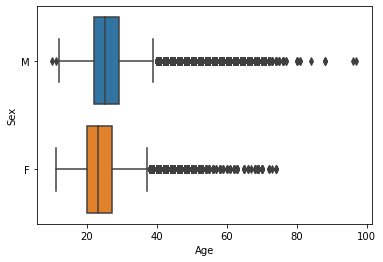

In [293]:
#Amžiaus išsidėstymas- mediana, 25, 75 persentilės, outliers
sns.boxplot(x='Age', y='Sex', data=df)

In [294]:
#Koreliacija tarp kintamųjų:
df_subset.corr()

,Age,Height,Weight,Year
Age,1.000000,0.138246,0.212069,-0.115137
Height,0.138246,1.000000,0.796573,0.047054
Weight,0.212069,0.796573,1.000000,0.018816
Year,-0.115137,0.047054,0.018816,1.000000


In [295]:
cmap = sns.diverging_palette(220, 20, as_cmap=True)

<AxesSubplot:>

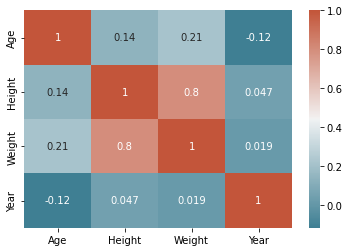

In [251]:
# labiausiai glaudžiai susiję h ir w
sns.heatmap(df_subset.corr(), annot = True, cmap = cmap)

In [252]:
df_subset = df_subset[~df_subset['Height'].isnull()]

In [253]:
columns = ['Age', 'Height', 'Weight', 'Year']
df_subset1 = df_subset[columns]
df_subset1 = df_subset1[~df_subset1['Weight'].isnull()]

In [296]:
df_subset1.isnull().sum()

Age       0
Height    0
Weight    0
Year      0
dtype: int64

In [297]:
# Tiesine regresija
# Sąryšis tarp svorio ir ūgio

In [298]:
y = df_subset1['Weight']
X = df_subset1[['Age', 'Height', 'Year']]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [299]:
X_train

,Age,Height,Year
64551,24.0,178.0,1968
52732,22.0,172.0,2004
173508,20.0,176.0,2000
103925,22.0,173.0,1964
202046,23.0,180.0,1992
...,...,...,...
180022,22.0,170.0,2000
198881,28.0,179.0,2000
163764,27.0,174.0,1968
112209,20.0,183.0,2002


In [300]:
y_train

64551      72.0
52732      64.0
173508     69.0
103925     73.0
202046    100.0
          ...  
180022     57.0
198881     68.0
163764     79.0
112209     85.0
69713      73.0
Name: Weight, Length: 164932, dtype: float64

In [301]:
X_test

,Age,Height,Year
207434,25.0,190.0,1996
191650,24.0,175.0,1980
123011,19.0,167.0,1988
178567,26.0,173.0,1976
43582,27.0,188.0,1956
...,...,...,...
147730,35.0,154.0,2004
81514,24.0,178.0,1996
154148,27.0,185.0,1964
148397,24.0,170.0,2002


In [302]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [303]:
# b0 laisvasis narys
print(lm.intercept_) 

-86.41158927730125


In [304]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficients'])
coeff_df

,Coefficients
Age,0.271382
Height,1.064908
Year,-0.018315


In [305]:
predictions = lm.predict(X_test)

In [306]:
predictions[0]

86.14901706025022

In [307]:
predictions[1]

70.19705015225186

Text(0, 0.5, 'Spėjamas svoris')

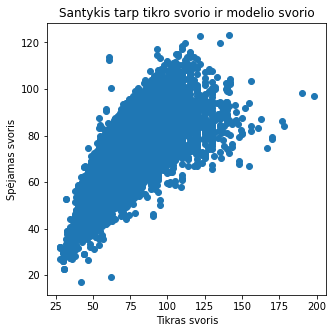

In [308]:
#X - tikras svoris, y - modelio spėjamas reikšmė
fig, ax = plt.subplots(1,1, figsize=(5,5))
ax.scatter(x=y_test, y=predictions)
ax.set_title('Santykis tarp tikro svorio ir modelio svorio')
ax.set_xlabel('Tikras svoris')
ax.set_ylabel('Spėjamas svoris')

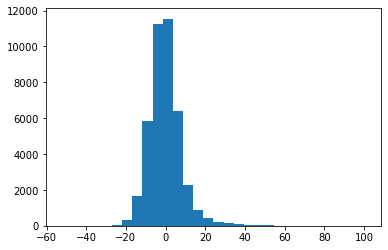

In [309]:
# paklaidų išsidėstymas,skirtumas tarp tikro svorio y_test ir spėjamo
plt.hist(y_test - predictions, bins=30);

In [310]:
#R kvadratas 0.65, parodo kaip gerai veikia modelis
r2_score(y_test, predictions)

0.6458062206951124

In [311]:
df_Medal = df[(df.Medal == 'Gold') | (df.Medal == 'Silver') | (df.Medal == 'Bronze')]
df_Medal = df_Medal[~df_Medal['region'].isnull()]
df_Medal.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal,region,notes
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold,Denmark,NaN
37,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 200 metres Breaststroke,Bronze,Finland,NaN
38,15,Arvo Ossian Aaltonen,M,30.0,NaN,NaN,Finland,FIN,1920 Summer,1920,Summer,Antwerpen,Swimming,Swimming Men's 400 metres Breaststroke,Bronze,Finland,NaN
40,16,Juhamatti Tapio Aaltonen,M,28.0,184.0,85.0,Finland,FIN,2014 Winter,2014,Winter,Sochi,Ice Hockey,Ice Hockey Men's Ice Hockey,Bronze,Finland,NaN
41,17,Paavo Johannes Aaltonen,M,28.0,175.0,64.0,Finland,FIN,1948 Summer,1948,Summer,London,Gymnastics,Gymnastics Men's Individual All-Around,Bronze,Finland,NaN


In [312]:
df_Gold = df[(df.Medal == 'Gold')]
df_Gold = df_Gold[~df_Gold['region'].isnull()]


In [313]:
df_Silver = df[(df.Medal == 'Silver')]
df_Silver = df_Silver[~df_Silver['region'].isnull()]


In [314]:
df_Bronze = df[(df.Medal == 'Bronze')]
df_Bronze = df_Bronze[~df_Bronze['region'].isnull()]


In [315]:
# Top šalys daugiausia laimėjusios Gold, Silver, bronze bendrai medalius
df_top5 = df_Medal['region'].value_counts().reset_index()
df_top5.sort_values(by='region', ascending=False)

,index,region
0,USA,5592
1,Russia,3944
2,Germany,3723
3,UK,1965
4,France,1681
...,...,...
114,Monaco,1
113,Djibouti,1
112,Gabon,1
111,Cyprus,1


In [316]:
# Top šalys daugiausia laimėjusios Aukso medalius
df_top5_gold = df_Gold['region'].value_counts().reset_index()
df_top5_gold.sort_values(by='region', ascending=False)

,index,region
0,USA,2627
1,Russia,1599
2,Germany,1293
3,UK,657
4,Italy,567
...,...,...
81,Syria,1
80,United Arab Emirates,1
79,Peru,1
78,Suriname,1


In [317]:
# Top šalys daugiausia laimėjusios Sidabro Medal
df_top5_silver = df_Silver['region'].value_counts().reset_index()
df_top5_silver.sort_values(by='region', ascending=False)


,index,region
0,USA,1619
1,Germany,1176
2,Russia,1169
3,UK,684
4,France,563
...,...,...
93,Ivory Coast,1
92,Zambia,1
91,Cyprus,1
90,Bahrain,1


In [318]:
# Top šalys daugiausia laimėjusios Bronzos Medal
df_top5_bronze = df_Bronze['region'].value_counts().reset_index()
df_top5_bronze.sort_values(by='region', ascending=False)


,index,region
0,USA,1346
1,Germany,1254
2,Russia,1176
3,France,627
4,UK,624
...,...,...
95,Barbados,1
94,Eritrea,1
93,Djibouti,1
92,Cameroon,1


Text(0.5, 1.0, 'Top Countries (Total Medals)')

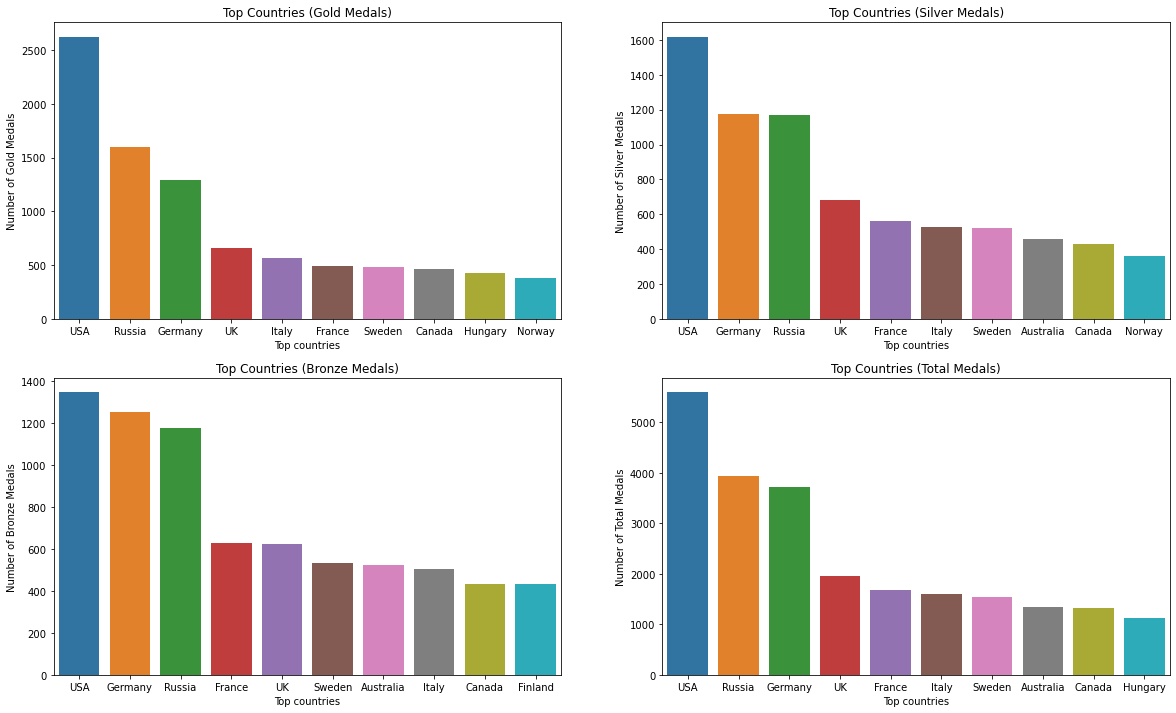

In [319]:
#Top šalys pagal medalių pasiskirstymą
fig, axs = plt.subplots(2,2, figsize=(20,12))
sns.barplot(x='index', y='region', data=df_top5_gold[:10], ax = axs[0, 0])
sns.barplot(x='index', y='region', data=df_top5_silver[:10], ax = axs[0, 1])
sns.barplot(x='index', y='region', data=df_top5_bronze[:10], ax = axs[1, 0])
sns.barplot(x='index', y='region', data=df_top5[:10], ax = axs[1, 1])
axs[0, 0].set_xlabel('Top countries')
axs[0, 0].set_ylabel('Number of Gold Medals')
axs[0, 0].set_title('Top Countries (Gold Medals)')

axs[0, 1].set_xlabel('Top countries')
axs[0, 1].set_ylabel('Number of Silver Medals')
axs[0, 1].set_title('Top Countries (Silver Medals)')

axs[1, 0].set_xlabel('Top countries')
axs[1, 0].set_ylabel('Number of Bronze Medals')
axs[1, 0].set_title('Top Countries (Bronze Medals)')

axs[1, 1].set_xlabel('Top countries')
axs[1, 1].set_ylabel('Number of Total Medals')
axs[1, 1].set_title('Top Countries (Total Medals)')

In [320]:
medals = df_Medal.groupby(['region','Medal'])['Medal'].count().unstack().fillna(0).astype(int)
medals['Total'] = medals['Bronze'] + medals['Silver'] + medals['Gold']
medals = medals[['Bronze','Silver','Gold','Total']].sort_values(by='Total', ascending=False)[:10]
medals

Medal,Bronze,Silver,Gold,Total
region,,,,
USA,1346,1619,2627,5592
Russia,1176,1169,1599,3944
Germany,1254,1176,1293,3723
UK,624,684,657,1965
France,627,563,491,1681
Italy,503,528,567,1598
Sweden,535,522,479,1536
Australia,522,456,366,1344
Canada,434,432,461,1327


<AxesSubplot:title={'center':'Top 10 countries by the most medals'}, xlabel='Country'>

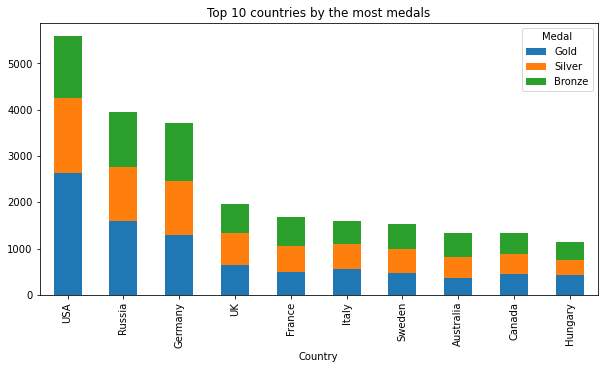

In [359]:
medals[['Gold', 'Silver', 'Bronze']].plot(kind='bar',  stacked=True,
                                          title='Top 10 countries by the most medals', xlabel='Country', figsize=(10,5))

Text(0.5, 1.0, 'Top 10 sports by all medals')

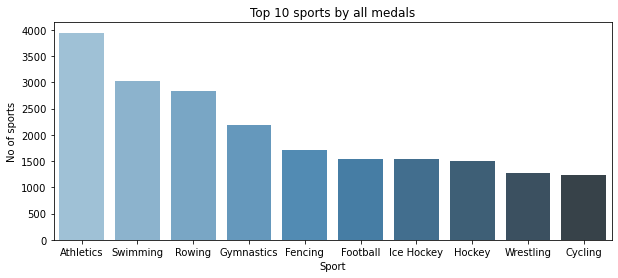

In [322]:
# Top 10 sporto šakų pagal visus medalius
df_top_sport = df_Medal['Sport'].value_counts().reset_index()
plt.subplots(figsize=(10,4))
sns.barplot(x='index', y='Sport', data=df_top_sport[:10], palette='Blues_d')
plt.xlabel("Sport")
plt.ylabel('No of sports')
plt.title('Top 10 sports by all medals')

In [323]:
df_top_sport = df_Medal['Sport'].value_counts().reset_index()
df_top_sport[:15]

,index,Sport
0,Athletics,3945
1,Swimming,3026
2,Rowing,2830
3,Gymnastics,2187
4,Fencing,1720
5,Football,1531
6,Ice Hockey,1530
7,Hockey,1497
8,Wrestling,1265
9,Cycling,1235


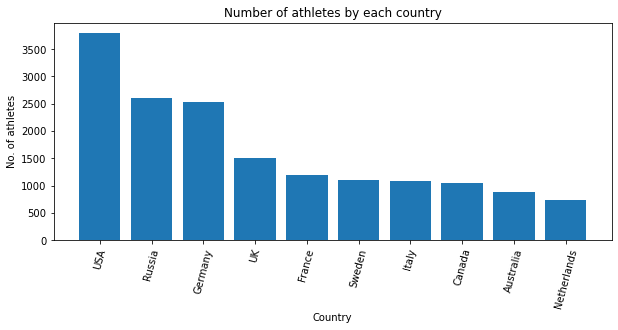

In [324]:
# Top 10 šalių, pagal laimėjusių medalį sportininkų skaičių
athletes_each_country = df_Medal.drop_duplicates(['Name']).groupby('region')['Name'].count().reset_index().sort_values("Name", ascending=False).head(10)
plt.subplots(figsize=(10,4))
plt.bar(athletes_each_country.region, athletes_each_country.Name)
plt.xlabel('Country')
plt.ylabel('No. of athletes')
plt.xticks(rotation=75)
plt.title('Number of athletes by each country');

In [325]:
athletes_each_country

,region,Name
123,USA,3792
98,Russia,2602
41,Germany,2532
122,UK,1503
38,France,1200
110,Sweden,1107
56,Italy,1075
18,Canada,1038
4,Australia,877
82,Netherlands,730


In [326]:
# Top 10 šalių, kurių atletai laimėjo mažiausiai medalių
athletes_each_country2 = df_Medal.drop_duplicates(['Name']).groupby('region')['Name'].count().reset_index().sort_values("Name", ascending=False).tail(10)
athletes_each_country2

,region,Name
100,Senegal,1
63,Kosovo,1
84,Niger,1
60,Jordan,1
108,Sudan,1
109,Suriname,1
47,Haiti,1
46,Guyana,1
45,Guatemala,1
0,Afghanistan,1


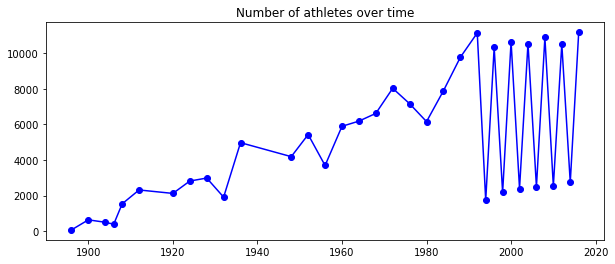

In [327]:
# Kaip keitėsi visų sportininkų skaičius per laiką
athletes_by_year = df.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('index')
athletes_by_year = athletes_by_year.rename(columns={'index':'Year', 'Year':'total_athletes'})
plt.subplots(figsize=(10,4))
plt.plot(athletes_by_year.Year, athletes_by_year.total_athletes, 'b-o')
plt.title('Number of athletes over time');

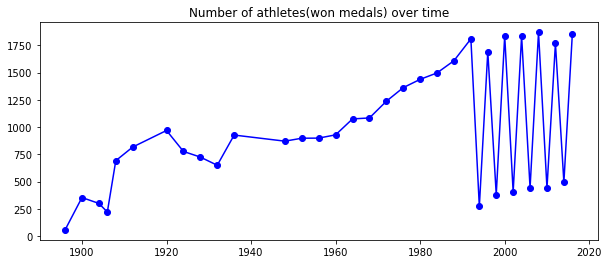

In [328]:
# Kaip keitėsi medalius laimėjusių sportininkų skaičius per laiką
athletes_by_year3 = df_Medal.drop_duplicates(['Year','Name'])['Year'].value_counts().reset_index().sort_values('index')
athletes_by_year3 = athletes_by_year3.rename(columns={'index':'Year', 'Year':'total_athletes'})
plt.subplots(figsize=(10,4))
plt.plot(athletes_by_year3.Year, athletes_by_year3.total_athletes, 'b-o')
plt.title('Number of athletes(won medals) over time');

In [329]:
athletes_by_year

,Year,total_athletes
34,1896,72
31,1900,638
32,1904,501
33,1906,392
30,1908,1537
25,1912,2316
27,1920,2122
20,1924,2817
19,1928,2985
28,1932,1913


In [330]:
def decades(num):
    if num in range (1896, 1927):
        return "1896 - 1926"
    elif num in range (1927,1958):
        return "1927 - 1957"
    elif num in range (1958, 1989):
        return "1958 - 1988"
    else:
        return "1989 - 2016"

In [331]:
df_Medal['Year'].map(decades)

3         1896 - 1926
37        1896 - 1926
38        1896 - 1926
40        1989 - 2016
41        1927 - 1957
             ...     
261604    1927 - 1957
261606    1958 - 1988
261608    1958 - 1988
261628    1989 - 2016
261629    1989 - 2016
Name: Year, Length: 39042, dtype: object

In [332]:
df_Medal['Quarter'] = df_Medal['Year'].map(decades)

In [333]:
df['Quarter'] = df['Year'].map(decades)

In [334]:
athletes_each_country1 = df.drop_duplicates(['Name']).groupby(['Quarter', 'region'])['Name'].count().sort_values(ascending=False).head(20)

In [335]:
#Kaip keitėsi bendras sportininkų skaičius kas 30 metų
athletes_each_country1

Quarter      region   
1958 - 1988  Germany      3498
1989 - 2016  USA          3391
1958 - 1988  USA          2843
1989 - 2016  Russia       2463
1958 - 1988  Russia       2384
1989 - 2016  Germany      2307
             China        2106
             Australia    2076
             Canada       2061
1927 - 1957  USA          1919
1989 - 2016  France       1889
             Japan        1883
             Italy        1820
1958 - 1988  UK           1762
             Canada       1719
1989 - 2016  UK           1697
1958 - 1988  Japan        1515
             Italy        1480
             France       1435
1989 - 2016  Spain        1409
Name: Name, dtype: int64

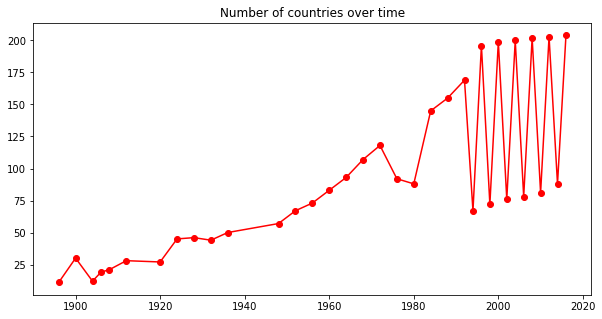

In [336]:
# Kaip keitėsi dalyvavusių šalių skaičius per laiką
countries_by_year = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
countries_by_year = countries_by_year.rename(columns={'index':'Year', 'Year':'total_countries'})
plt.subplots(figsize=(10,5))
plt.plot(countries_by_year.Year, countries_by_year.total_countries, 'r-o')
plt.title('Number of countries over time');

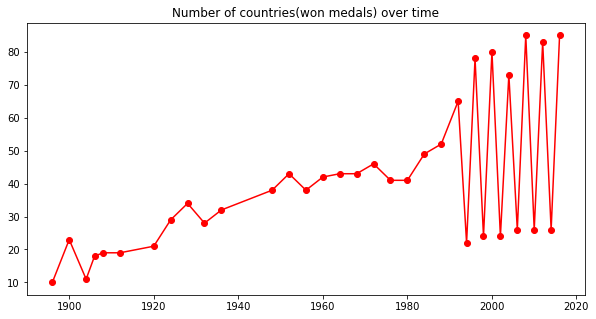

In [337]:
# Kaip keitėsi šalių, laimėjusių medalius, skaičius per laiką
countries_by_year4 = df_Medal.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')
countries_by_year4 = countries_by_year4.rename(columns={'index':'Year', 'Year':'total_countries'})
plt.subplots(figsize=(10,5))
plt.plot(countries_by_year4.Year, countries_by_year4.total_countries, 'r-o')
plt.title('Number of countries(won medals) over time');

In [338]:
countries_by_year

,Year,total_countries
34,1896,11
28,1900,30
33,1904,12
32,1906,19
31,1908,21
29,1912,28
30,1920,27
26,1924,45
25,1928,46
27,1932,44


In [339]:
# Lentelė, kurioje galima stebėti kaip keitėsi kas 30 m. medalių skaičius pagal sporto rūšį.
pd.pivot_table(data = df_Medal, index = 'Sport', columns = 'Quarter', values = 'Medal', aggfunc = 'count').fillna(0).astype(int)[:20]

Quarter,1896 - 1926,1927 - 1957,1958 - 1988,1989 - 2016
Sport,,,,
Aeronautics,0,1,0,0
Alpine Skiing,0,61,156,211
Alpinism,12,4,0,0
Archery,103,0,48,168
Art Competitions,30,122,0,0
Athletics,743,715,1190,1297
Badminton,0,0,0,168
Baseball,0,0,0,336
Basketball,0,146,431,501


In [340]:
#Kaip keitėsi bendras medalių skaičius per laiką.
medals_by_year= df_Medal.groupby('Year')['Medal'].count().sort_index(ascending=True)

<AxesSubplot:xlabel='Year'>

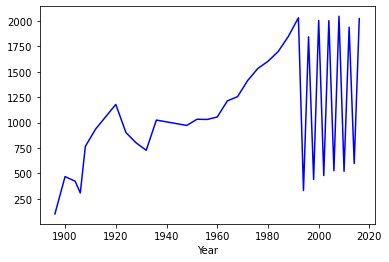

In [341]:
medals_by_year.plot(x ='Year', y='Medal', kind='line', color='b')

In [342]:
#  Sportininkai daugiausia laimėję medalių
top_medalists = df_Medal.groupby('Name')['Medal'].count().reset_index().sort_values('Medal', ascending=False).head(10)

add_df = df_Medal.drop_duplicates('Name')[['Name', 'region', 'Sport']]
top_medalists_df = top_medalists.merge(add_df, on='Name', how='left')
top_medalists_df

,Name,Medal,region,Sport
0,"Michael Fred Phelps, II",28,USA,Swimming
1,Larysa Semenivna Latynina (Diriy-),18,Russia,Gymnastics
2,Nikolay Yefimovich Andrianov,15,Russia,Gymnastics
3,Borys Anfiyanovych Shakhlin,13,Russia,Gymnastics
4,Takashi Ono,13,Japan,Gymnastics
5,Ole Einar Bjrndalen,13,Norway,Biathlon
6,Edoardo Mangiarotti,13,Italy,Fencing
7,Birgit Fischer-Schmidt,12,Germany,Canoeing
8,"Dara Grace Torres (-Hoffman, -Minas)",12,USA,Swimming
9,Sawao Kato,12,Japan,Gymnastics


<AxesSubplot:xlabel='Age', ylabel='count'>

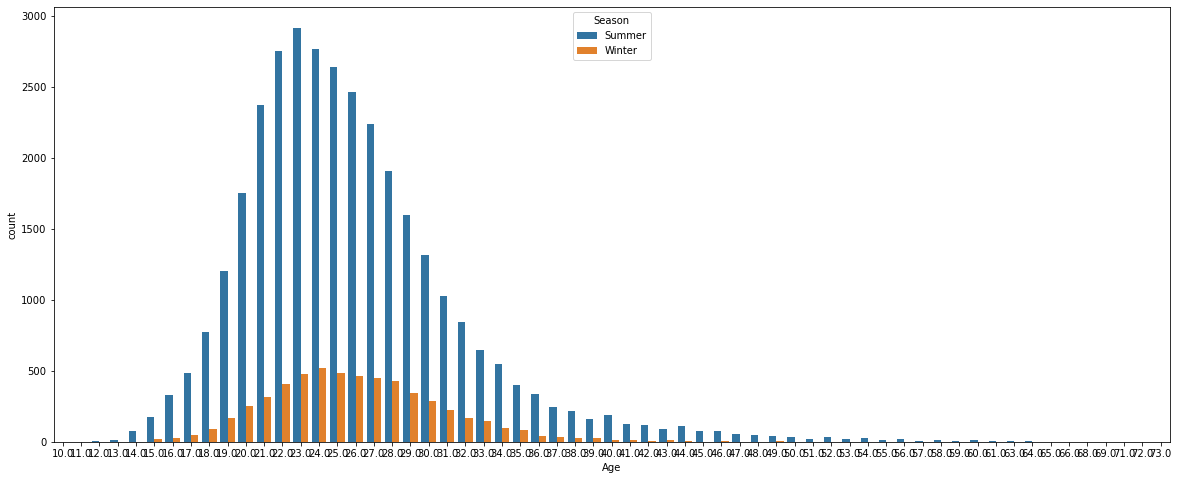

In [352]:
#Amžiaus santykis su Total medal pagal sezonus
plt.figure(figsize=(20, 8))
sns.countplot(data=df_Medal, saturation=0.75, x='Age', hue='Season')

<AxesSubplot:xlabel='Age', ylabel='count'>

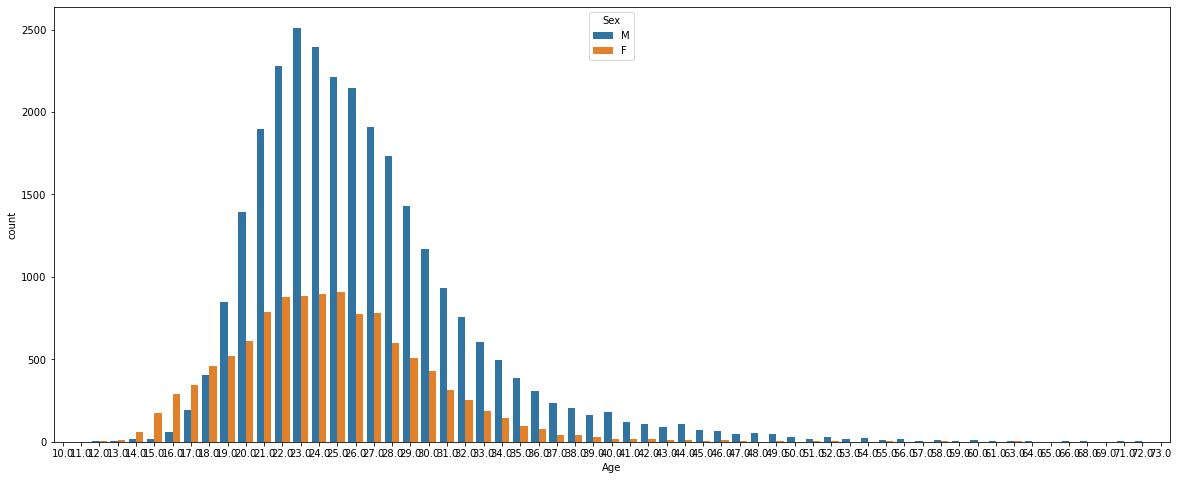

In [344]:
#Amžiaus santykis su Total medal pagal lytį
plt.figure(figsize=(20, 8))
sns.countplot(data=df_Medal, saturation=0.75, x='Age', hue='Sex')

In [353]:
#Lietuva, Latvija

In [354]:
LT_LV_athletes = df_Medal[df_Medal['region'].isin(['Lithuania', 'Latvia'])]


In [355]:
LT_LV_athletes.groupby('region')['Medal'].count()

region
Latvia       35
Lithuania    61
Name: Medal, dtype: int64

In [356]:
# Lietuvos ir Latvijos laimėtų medalių skaičius pagal sporto šaką
LT_LV_athletes.groupby(['Sport', 'region'])['Medal'].count().sort_values(ascending=False)[:20]

Sport              region   
Basketball         Lithuania    35
Luge               Latvia        9
Rowing             Lithuania     6
Athletics          Lithuania     5
                   Latvia        5
Modern Pentathlon  Lithuania     4
Bobsleigh          Latvia        4
Canoeing           Lithuania     3
Cycling            Latvia        3
Beach Volleyball   Latvia        2
Weightlifting      Latvia        2
Skeleton           Latvia        2
Canoeing           Latvia        2
Wrestling          Lithuania     2
Gymnastics         Latvia        2
Modern Pentathlon  Latvia        1
Judo               Latvia        1
Sailing            Lithuania     1
Shooting           Latvia        1
                   Lithuania     1
Name: Medal, dtype: int64

In [357]:
# Lietuvos ir Latvijos atletų laimėtų medalių skaičius
LT_LV_athletes.groupby(['region', 'Name'])['Medal'].count().sort_values(ascending=False)[:10]

region     Name                       
Lithuania  Virgilijus Alekna              3
Latvia     Andris ics                     3
           Juris ics                      3
Lithuania  Gintaras Einikis               3
Latvia     Mrti Rubenis                   2
Lithuania  Rimas Kurtinaitis              2
Latvia     Viktors erbatihs               2
Lithuania  Artras Karniovas               2
           Raimondas arnas Mariulionis    2
Latvia     Mris trombergs                 2
Name: Medal, dtype: int64

In [ ]:
#Išvados

Remiantis atlikta analize, galima pastebėti, kad per 120 metų daugiausia medalių bendrai ir 
kiekvienos spalvos atskirai, taip pat ir pagal sportininkų skaičių lyderis yra 
Jungtinės Valstijos. Sporto šaka, kuri laimi daugiausia medalių - yra Atletika. 
Sportininkų moterų ir vyrų skaičiaus skiriasi per pusę, moterų yra mažiau nei vyrų.
Medalius laimėti didžiausią tikimybę turi tos šalys, kurioms atstovauja didelis sportininkų skaičius, 
sportininkų amžius yra tarp 20 ir 30.